<a href="https://colab.research.google.com/github/fpiedra47/predicciones-ventas/blob/main/ProyectoParte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
filename = '/content/drive/My Drive/CodingDojo/Codigos/Datos/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**¿Hay valores faltantes en el conjunto de datos?**

In [ ]:
#df.head()
for cont in df.columns:
  if df[cont].isna().sum()!=0:
    print(cont, '-', df[cont].isna().sum(), "celdas vacías")

Item_Weight - 1463 celdas vacías
Outlet_Size - 2410 celdas vacías


In [ ]:
# Cantidad por tipo de producto
df.loc[:, 'Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# Listado por tipo "dairy"
f1 = df.loc[:,'Item_Type'] == 'Dairy'
print (f1)

0        True
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Type, Length: 8523, dtype: bool


In [ ]:
# Cuántos productos del tipo "diario" existen en cada tipo de tienda
df.loc[f1,:].groupby('Outlet_Type')['Item_Type'].count()

Outlet_Type
Grocery Store         92
Supermarket Type1    450
Supermarket Type2     73
Supermarket Type3     67
Name: Item_Type, dtype: int64

In [ ]:
# Todos aquellos productos que se han vendido mas de $10000
f2 = df.loc[:, 'Item_Outlet_Sales'] > 10000
print (f2)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Outlet_Sales, Length: 8523, dtype: bool


In [ ]:
df.loc[f2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,FDU14,NaN,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4888,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7191,NCH18,NaN,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882


In [ ]:
#Promedio de la cantidad de productos del tipo "Diario" en cada una de las tiendas
df.loc[f1, 'Item_Outlet_Sales'].mean()

2232.5425970674487

In [42]:
#El plot refleja todos aquellos productos 'Household' con ventas mayor a $10000
x1 = df['Item_Type'] == 'Household'
#print (x1)
x2 = df['Item_Outlet_Sales'] > 10000
#df.loc[:, 'Item_Outlet_Sales'].value_counts()
resul = df.loc[:, 'Item_Outlet_Sales'].count()
print (resul)

8523


In [46]:
y = df.loc[x1 & x2,:]
#print (y)
y['Item_Outlet_Sales'].cumsum()
y2 = df.loc[~x1 & x2,:]
y2['Item_Outlet_Sales'].cumsum()

1009    10236.6750
1450    21681.7770
4349    32675.4666
4888    42932.1156
5223    55049.6756
6541    65356.2596
Name: Item_Outlet_Sales, dtype: float64

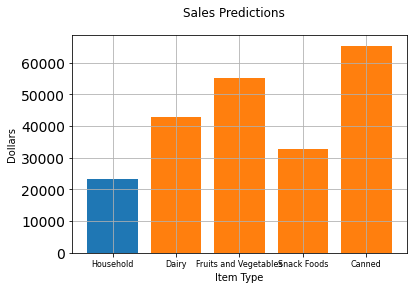

In [63]:
import matplotlib.pyplot as plt
plt.bar(y['Item_Type'], y['Item_Outlet_Sales'].cumsum())
plt.bar(y2['Item_Type'], y2['Item_Outlet_Sales'].cumsum())
plt.xlabel('Item Type')
plt.ylabel('Dollars')
plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.suptitle('Sales Predictions')
plt.grid(True)
plt.show()